## Transmission Competition

### Imports

In [ ]:
from typing import Optional
import numpy as np
import os
import matplotlib.pyplot as plt
from transmission_competition.HuffmanCoder import HuffmanCoder
from transmission_competition.LempelZivCoder import LempelZivCoder
from transmission_competition.HammingCoder74 import HammingCoder74
from transmission_competition.EntropyCalculator import EntropyCalculator
from transmission_competition.PSKModulator import PSKModulator
from transmission_competition.CSSModulator import CSSModulator 
from transmission_competition.Synchroniser import Synchroniser
from TransmissionModule import TransmissionModule

### Input Definition
Here we can change our input string.


In [ ]:
file_path = "input_text_short.txt"
file_handle = open(file_path, "r")
input_text = file_handle.read()
file_handle.close()

print(input_text)

Hello, world!


### Soruce Coding
We implemented Huffman and Lempel Ziv source coding.
Both of them have a encode and a decode method. We convert from a string to an np.ndarray and vice versa.

In [ ]:
huffman_coder = HuffmanCoder()
lempel_ziv_coder = LempelZivCoder()

# Huffman Coding
huffman_encoded = huffman_coder.encode(input_text)
huffman_decoded = huffman_coder.decode(huffman_encoded)

print("***** HUFFMAN CODING **********************************************")
print(f"Original Text: {input_text!r}")
print(f"Encoded (Huffman): {huffman_encoded}")
print(f"Decoded (Huffman): {huffman_decoded!r}")
print("Is Decoded Equal to Original?:", huffman_decoded == input_text)
print("*******************************************************************\n")

# Lempel-Ziv Coding
lempelziv_encoded = lempel_ziv_coder.encode(input_text)
lempelziv_decoded = lempel_ziv_coder.decode(lempelziv_encoded)

print("***** LEMPEL-ZIV CODING *******************************************")
print(f"Original Text: {input_text!r}")
print(f"Encoded (Lempel-Ziv): {lempelziv_encoded}")
print(f"Decoded (Lempel-Ziv): {lempelziv_decoded!r}")
print("Is Decoded Equal to Original?:", lempelziv_decoded == input_text)
print("*******************************************************************")


***** HUFFMAN CODING **********************************************
Original Text: 'Hello, world!'
Encoded (Huffman): [0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0]
Decoded (Huffman): 'Hello, world!'
Is Decoded Equal to Original?: True
*******************************************************************

***** LEMPEL-ZIV CODING *******************************************
Original Text: 'Hello, world!'
Encoded (Lempel-Ziv): [0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0

### Channel Coding
We implemented (7,4) Hamming channel coding.
The input as well as the output is obviously a np.ndarray. The channel coded message is expected to be 7/4 times larger than the source coded version.

In [ ]:
hamming_coder_74 = HammingCoder74()

test_sequence = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Hamming Coding
hamming_encoded = hamming_coder_74.encode(test_sequence)

# Simulate channel errors
per_bit_error_rate = 0.05  # Example error rate; adjust as needed
transmitted, error_desc = hamming_coder_74.channel_simulator(hamming_encoded, per_bit_error_rate)

# Decode the transmitted (possibly erroneous) code
hamming_decoded = hamming_coder_74.decode(transmitted)

print("***** HAMMING CODING **********************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Encoded (Hamming): {hamming_encoded}")
print(f"Transmitted (after channel simulation): {transmitted}")
print(f"Error Description: {error_desc}")
print(f"Decoded (Hamming): {hamming_decoded}")
print("Is Decoded Equal to Original?:", np.array_equal(hamming_decoded, test_sequence))
print("*******************************************************************\n")


***** HAMMING CODING **********************************************
Original Sequence: [0 1 0 0 1 0 1 1]
Encoded (Hamming): [1 0 0 1 1 0 0 0 1 1 0 0 1 1]
Transmitted (after channel simulation): [1 0 0 1 1 1 0 0 0 1 0 0 1 1]
Error Description: 2 bit errors at positions 5, 8
Decoded (Hamming): [0 1 0 0 1 0 1 1]
Is Decoded Equal to Original?: True
*******************************************************************



### Modulation

We have implemented three types of modulation:

- PSK
- QPSK
- Chirp Modulation

All of them take a numpy array (`np.ndarray`) as input and output a numpy array with float values representing the signal.

In [ ]:
psk_modulator = PSKModulator()
css_modulator = CSSModulator()
# qpsl_modulator = QPSKModulator() WILL BE ADDED LATER

# PSK (QPSK) requires EVEN number of bits (2 bits per symbol)
# CSS can handle any number of bits (1 bit per symbol)
test_sequence = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

# Noise parameters
SNR_DB = 10.0  # Signal-to-Noise Ratio in dB

# PSK Modulation
psk_modulated = psk_modulator.PSK_modulate(test_sequence)
psk_noisy = psk_modulator.add_awgn_noise(psk_modulated, SNR_DB)
psk_demodulated = psk_modulator.PSK_demodulate(psk_noisy)

print("***** PSK MODULATION **********************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Modulated Signal Shape: {psk_modulated.shape}")
print(f"SNR: {SNR_DB} dB")
print(f"Modulated Signal (first 20 samples): {psk_modulated[:20]}")
print(f"Noisy Signal (first 20 samples): {psk_noisy[:20]}")
print(f"Demodulated Sequence: {psk_demodulated}")
print("Is Demodulated Equal to Original?:", np.array_equal(psk_demodulated, test_sequence))
print("*******************************************************************\n")

# CSS (Chirp Spread Spectrum) Modulation
css_modulated = css_modulator.CSS_modulate(test_sequence)
css_noisy = css_modulator.add_awgn_noise(css_modulated, SNR_DB)
css_demodulated = css_modulator.CSS_demodulate(css_noisy)

print("***** CSS (CHIRP) MODULATION **************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Modulated Signal Shape: {css_modulated.shape}")
print(f"SNR: {SNR_DB} dB")
print(f"Modulated Signal (first 20 samples): {css_modulated[:20]}")
print(f"Noisy Signal (first 20 samples): {css_noisy[:20]}")
print(f"Demodulated Sequence: {css_demodulated}")
print("Is Demodulated Equal to Original?:", np.array_equal(css_demodulated, test_sequence))
print("*******************************************************************\n")


***** PSK MODULATION **********************************************
Original Sequence: [0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 1]
Modulated Signal Shape: (2100,)
SNR: 10.0 dB
Modulated Signal (first 20 samples): [ 0.70710678  0.98768834  0.89100652  0.4539905  -0.15643447 -0.70710678
 -0.98768834 -0.89100652 -0.4539905   0.15643447  0.70710678  0.98768834
  0.89100652  0.4539905  -0.15643447 -0.70710678 -0.98768834 -0.89100652
 -0.4539905   0.15643447]
Noisy Signal (first 20 samples): [ 0.75614662  1.17406853  0.63478188  0.80494037 -0.43451031 -0.54830105
 -0.43968725 -0.81133847 -0.47142186  0.29210273  0.71202728  0.71741229
  1.13522917  0.20284015 -0.24764276 -0.72786878 -0.66155095 -0.84769097
 -0.58143886  0.26809035]
Demodulated Sequence: [0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 1]
Is Demodulated Equal to Original?: True
*******************************************************************

***

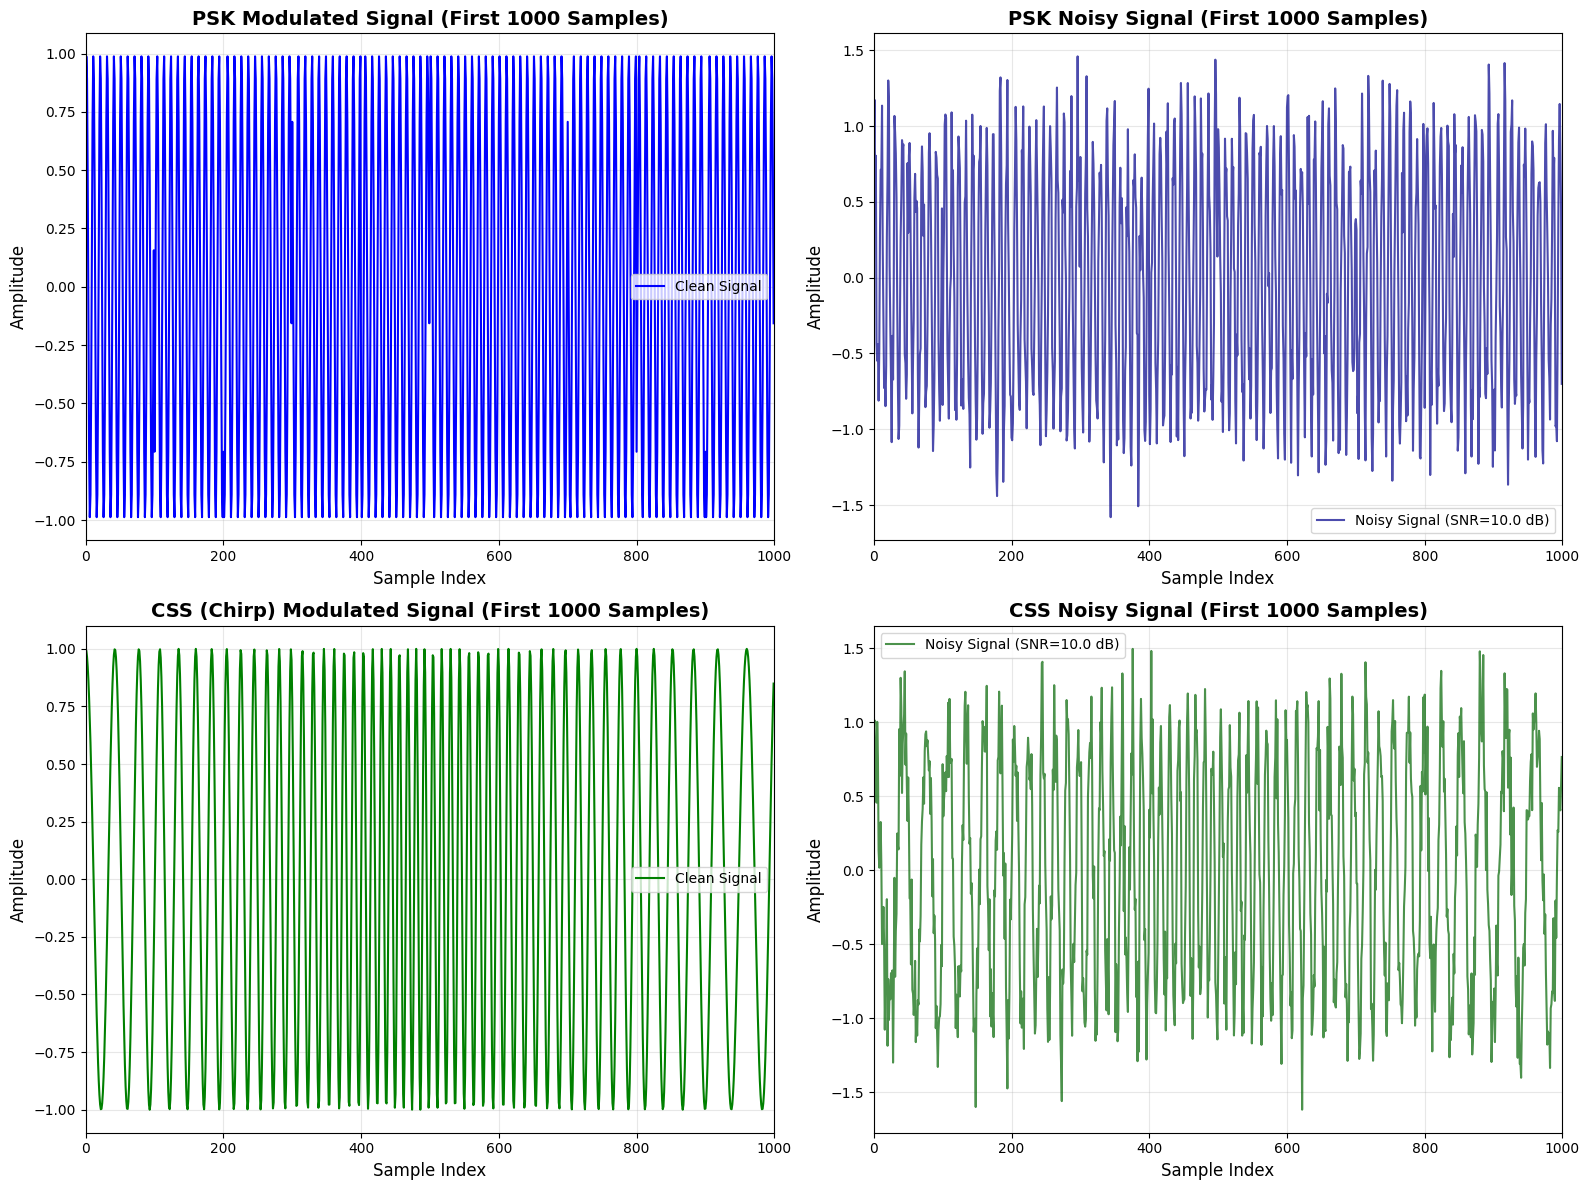

In [ ]:
# Visualization of Modulated Signals
N = 1000  # Number of first samples to plot

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot PSK Modulated Signal (first N samples)
axes[0, 0].plot(psk_modulated[:N], linewidth=1.5, color='blue', label='Clean Signal')
axes[0, 0].set_title('PSK Modulated Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sample Index', fontsize=12)
axes[0, 0].set_ylabel('Amplitude', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(0, N)
axes[0, 0].legend()

# Plot PSK Noisy Signal
axes[0, 1].plot(psk_noisy[:N], linewidth=1.5, color='darkblue', alpha=0.7, label=f'Noisy Signal (SNR={SNR_DB} dB)')
axes[0, 1].set_title('PSK Noisy Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sample Index', fontsize=12)
axes[0, 1].set_ylabel('Amplitude', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(0, N)
axes[0, 1].legend()

# Plot CSS Modulated Signal (first N samples)
axes[1, 0].plot(css_modulated[:N], linewidth=1.5, color='green', label='Clean Signal')
axes[1, 0].set_title('CSS (Chirp) Modulated Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sample Index', fontsize=12)
axes[1, 0].set_ylabel('Amplitude', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, N)
axes[1, 0].legend()

# Plot CSS Noisy Signal
axes[1, 1].plot(css_noisy[:N], linewidth=1.5, color='darkgreen', alpha=0.7, label=f'Noisy Signal (SNR={SNR_DB} dB)')
axes[1, 1].set_title('CSS Noisy Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('Amplitude', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, N)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


### Synchronisation

To ensure the receiver knows where the signal starts and ends, we need to pad it with a known pattern before and after the actual signal.
The receiver then can extract the actual signal by removing the known pattern. The idea is to make the preamble and the postamble an increasing or decreasing freqeunz ramp up or ramp down. for the depadding we want to use simple autocorrelation to find the index with the largest overlap.

In [ ]:
# Initialize Synchronisation with default parameters
synchroniser = Synchroniser()

test_signal = psk_modulated

print("***** SYNCHRONISATION (PADDING/DEPADDING) ************************")
print(f"Original Signal Length: {len(test_signal)} samples")

# Add padding (preamble and postamble)
padded_signal = synchroniser.pad(test_signal)
print(f"Padded Signal Length: {len(padded_signal)} samples")
print(f"Preamble Length: {synchroniser.preamble_length} samples")
print(f"Postamble Length: {synchroniser.postamble_length} samples")

# Simulate transmission (optional: add noise)
SNR_DB_SYNC = 15.0  # Higher SNR for better synchronization
transmitted_signal = psk_modulator.add_awgn_noise(padded_signal, SNR_DB_SYNC)

# Remove padding (depadding)
extracted_signal, sync_info = synchroniser.depad(transmitted_signal)
print(f"\nExtracted Signal Length: {len(extracted_signal)} samples")
print(f"Expected Signal Length: {len(test_signal)} samples")
print(f"\nSynchronization Info:")
print(f"  Preamble detected at index: {sync_info['preamble_idx']}")
print(f"  Postamble detected at index: {sync_info['postamble_idx']}")
print(f"  Signal starts at: {sync_info['signal_start']}")
print(f"  Signal ends at: {sync_info['signal_end']}")
print(f"  Preamble correlation peak: {sync_info['max_preamble_corr']:.4f}")
print(f"  Postamble correlation peak: {sync_info['max_postamble_corr']:.4f}")

# Check if extracted signal matches original (allow small length difference due to noise)
length_match = abs(len(extracted_signal) - len(test_signal)) <= 1000
print(f"\nLength Match (within 1000 samples): {length_match}")

# Calculate signal similarity (for the overlapping part)
min_len = min(len(extracted_signal), len(test_signal))
if min_len > 0:
    correlation = np.corrcoef(extracted_signal[:min_len], test_signal[:min_len])[0, 1]
    print(f"Signal Correlation: {correlation:.4f}")
print("*******************************************************************\n")

***** SYNCHRONISATION (PADDING/DEPADDING) ************************
Original Signal Length: 2100 samples
Padded Signal Length: 4100 samples
Preamble Length: 1000 samples
Postamble Length: 1000 samples

Extracted Signal Length: 2100 samples
Expected Signal Length: 2100 samples

Synchronization Info:
  Preamble detected at index: 0
  Postamble detected at index: 3100
  Signal starts at: 1000
  Signal ends at: 3100
  Preamble correlation peak: 13.6147
  Postamble correlation peak: 13.7375

Length Match (within 1000 samples): True
Signal Correlation: 0.9891
*******************************************************************



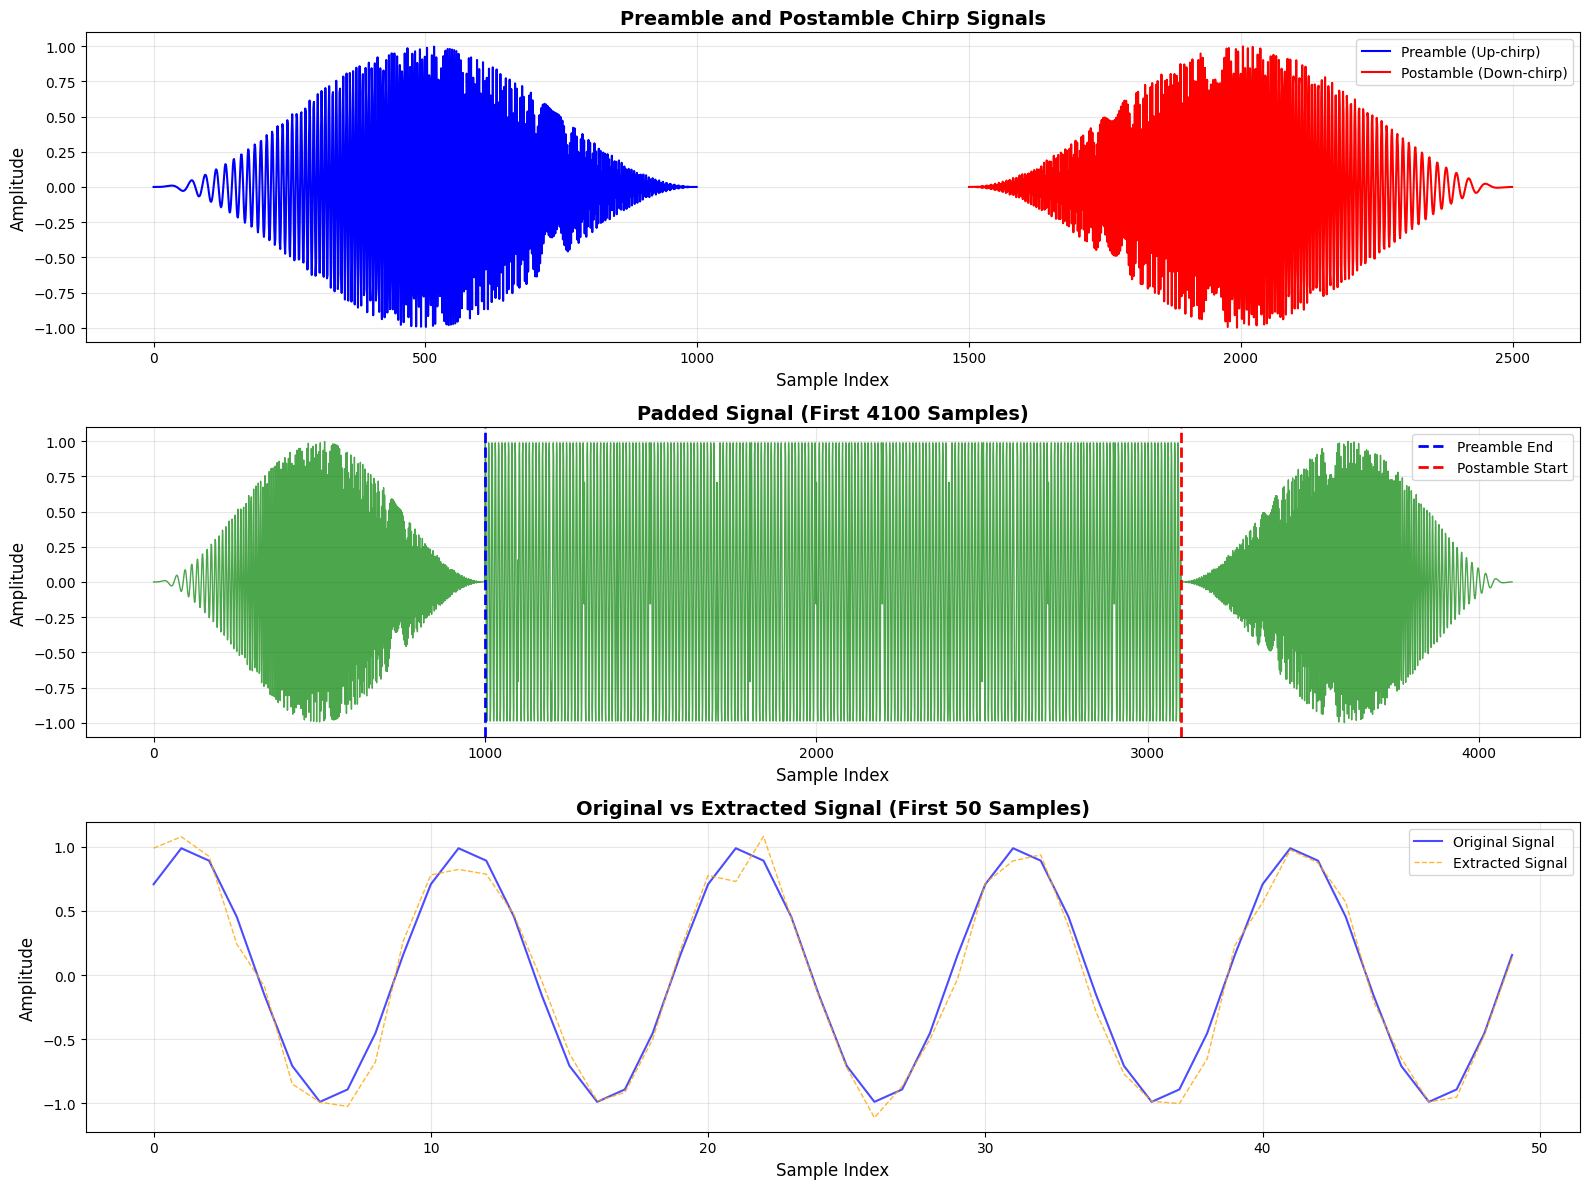

In [ ]:
# Visualize the padding and synchronization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Preamble and Postamble chirps
axes[0].plot(synchroniser.preamble, linewidth=1.5, color='blue', label='Preamble (Up-chirp)')
axes[0].plot(np.arange(len(synchroniser.postamble)) + len(synchroniser.preamble) + 500, 
             synchroniser.postamble, linewidth=1.5, color='red', label='Postamble (Down-chirp)')
axes[0].set_title('Preamble and Postamble Chirp Signals', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample Index', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: Padded signal overview (showing first 5000 samples)
N_overview = min(5000, len(padded_signal))
axes[1].plot(padded_signal[:N_overview], linewidth=1.0, color='green', alpha=0.7)
axes[1].axvline(x=synchroniser.preamble_length, color='blue', linestyle='--', 
                linewidth=2, label='Preamble End')
if len(padded_signal) - synchroniser.postamble_length < N_overview:
    axes[1].axvline(x=len(padded_signal) - synchroniser.postamble_length, 
                    color='red', linestyle='--', linewidth=2, label='Postamble Start')
axes[1].set_title(f'Padded Signal (First {N_overview} Samples)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sample Index', fontsize=12)
axes[1].set_ylabel('Amplitude', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Original vs Extracted signal comparison (first 2000 samples)
N_compare = min(50, len(test_signal), len(extracted_signal))
axes[2].plot(test_signal[:N_compare], linewidth=1.5, color='blue', alpha=0.7, label='Original Signal')
axes[2].plot(extracted_signal[:N_compare], linewidth=1.0, color='orange', 
             linestyle='--', alpha=0.8, label='Extracted Signal')
axes[2].set_title(f'Original vs Extracted Signal (First {N_compare} Samples)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Sample Index', fontsize=12)
axes[2].set_ylabel('Amplitude', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

### Testing Transmission Robustness

Let's test different transmission scenarios to see how robust our synchronization is:

In [ ]:
# Test different transmission scenarios
test_scenarios = [
    {
        'name': 'Clean transmission (high SNR)',
        'snr_db': 20.0,
        'add_before': 0,
        'add_after': 0,
        'cut_from_start': 0,
        'cut_from_end': 0
    },
    {
        'name': 'Noisy transmission (low SNR)',
        'snr_db': 5.0,
        'add_before': 0,
        'add_after': 0,
        'cut_from_start': 0,
        'cut_from_end': 0
    },
    {
        'name': 'Early recording start (500 noise samples before)',
        'snr_db': 15.0,
        'add_before': 500,
        'add_after': 0,
        'cut_from_start': 0,
        'cut_from_end': 0
    },
    {
        'name': 'Late recording stop (800 noise samples after)',
        'snr_db': 15.0,
        'add_before': 0,
        'add_after': 800,
        'cut_from_start': 0,
        'cut_from_end': 0
    },
    {
        'name': 'Preamble partially cut (300 samples)',
        'snr_db': 15.0,
        'add_before': 0,
        'add_after': 0,
        'cut_from_start': 300,
        'cut_from_end': 0
    },
    {
        'name': 'Postamble partially cut (400 samples)',
        'snr_db': 15.0,
        'add_before': 0,
        'add_after': 0,
        'cut_from_start': 0,
        'cut_from_end': 400
    },
    {
        'name': 'Extreme: noise before+after + partial cuts',
        'snr_db': 10.0,
        'add_before': 600,
        'add_after': 700,
        'cut_from_start': 200,
        'cut_from_end': 250
    },
    {
        'name': 'Severe preamble damage (70% cut)',
        'snr_db': 15.0,
        'add_before': 0,
        'add_after': 0,
        'cut_from_start': 700,  # 70% of 1000 sample preamble
        'cut_from_end': 0
    }
]

# Run all test scenarios
print("="*80)
print("TRANSMISSION ROBUSTNESS TESTING")
print("="*80)

results = []

for scenario in test_scenarios:
    print(f"\n{'='*80}")
    print(f"Scenario: {scenario['name']}")
    print(f"{'='*80}")
    
    # Simulate transmission
    transmitted, trans_info = synchroniser.simulate_transmission(
        padded_signal,
        snr_db=scenario['snr_db'],
        add_before=scenario['add_before'],
        add_after=scenario['add_after'],
        cut_from_start=scenario['cut_from_start'],
        cut_from_end=scenario['cut_from_end']
    )
    
    print(f"Transmission settings:")
    print(f"  SNR: {trans_info['snr_db']} dB")
    print(f"  Added before: {trans_info['add_before']} samples")
    print(f"  Added after: {trans_info['add_after']} samples")
    print(f"  Cut from start: {trans_info['cut_from_start']} samples")
    print(f"  Cut from end: {trans_info['cut_from_end']} samples")
    print(f"  Length change: {trans_info['length_change']} samples")
    
    # Try to extract the signal
    try:
        extracted, sync_info = synchroniser.depad(transmitted)
        
        # Calculate recovery metrics
        expected_length = len(test_signal)
        actual_length = len(extracted)
        length_error = abs(actual_length - expected_length)
        length_error_pct = (length_error / expected_length) * 100
        
        # Calculate signal correlation
        min_len = min(len(extracted), len(test_signal))
        if min_len > 100:  # Need reasonable length for correlation
            signal_corr = np.corrcoef(extracted[:min_len], test_signal[:min_len])[0, 1]
        else:
            signal_corr = 0.0
        
        print(f"\nExtraction results:")
        print(f"  Preamble correlation: {sync_info['max_preamble_corr']:.4f}")
        print(f"  Postamble correlation: {sync_info['max_postamble_corr']:.4f}")
        print(f"  Expected length: {expected_length} samples")
        print(f"  Extracted length: {actual_length} samples")
        print(f"  Length error: {length_error} samples ({length_error_pct:.1f}%)")
        print(f"  Signal correlation: {signal_corr:.4f}")
        
        success = (length_error_pct < 10) and (signal_corr > 0.7)
        print(f"  ✓ SUCCESS" if success else f"  ✗ FAILED")
        
        results.append({
            'scenario': scenario['name'],
            'success': success,
            'length_error_pct': length_error_pct,
            'signal_correlation': signal_corr,
            'preamble_corr': sync_info['max_preamble_corr'],
            'postamble_corr': sync_info['max_postamble_corr']
        })
        
    except Exception as e:
        print(f"\n✗ EXTRACTION FAILED: {e}")
        results.append({
            'scenario': scenario['name'],
            'success': False,
            'length_error_pct': 100,
            'signal_correlation': 0.0,
            'preamble_corr': 0.0,
            'postamble_corr': 0.0
        })

# Summary
print(f"\n\n{'='*80}")
print("SUMMARY")
print(f"{'='*80}")
successful = sum(1 for r in results if r['success'])
total = len(results)
print(f"Success rate: {successful}/{total} ({(successful/total)*100:.1f}%)")
print(f"\nDetailed results:")
for r in results:
    status = "✓" if r['success'] else "✗"
    print(f"{status} {r['scenario'][:50]:50s} | Corr: {r['signal_correlation']:.3f} | Err: {r['length_error_pct']:.1f}%")

TRANSMISSION ROBUSTNESS TESTING

Scenario: Clean transmission (high SNR)
Transmission settings:
  SNR: 20.0 dB
  Added before: 0 samples
  Added after: 0 samples
  Cut from start: 0 samples
  Cut from end: 0 samples
  Length change: 0 samples

Extraction results:
  Preamble correlation: 13.7698
  Postamble correlation: 13.7076
  Expected length: 2100 samples
  Extracted length: 2100 samples
  Length error: 0 samples (0.0%)
  Signal correlation: 0.9964
  ✓ SUCCESS

Scenario: Noisy transmission (low SNR)
Transmission settings:
  SNR: 5.0 dB
  Added before: 0 samples
  Added after: 0 samples
  Cut from start: 0 samples
  Cut from end: 0 samples
  Length change: 0 samples

Extraction results:
  Preamble correlation: 13.9930
  Postamble correlation: 13.8840
  Expected length: 2100 samples
  Extracted length: 2100 samples
  Length error: 0 samples (0.0%)
  Signal correlation: 0.9092
  ✓ SUCCESS

Scenario: Early recording start (500 noise samples before)
Transmission settings:
  SNR: 15.0 dB


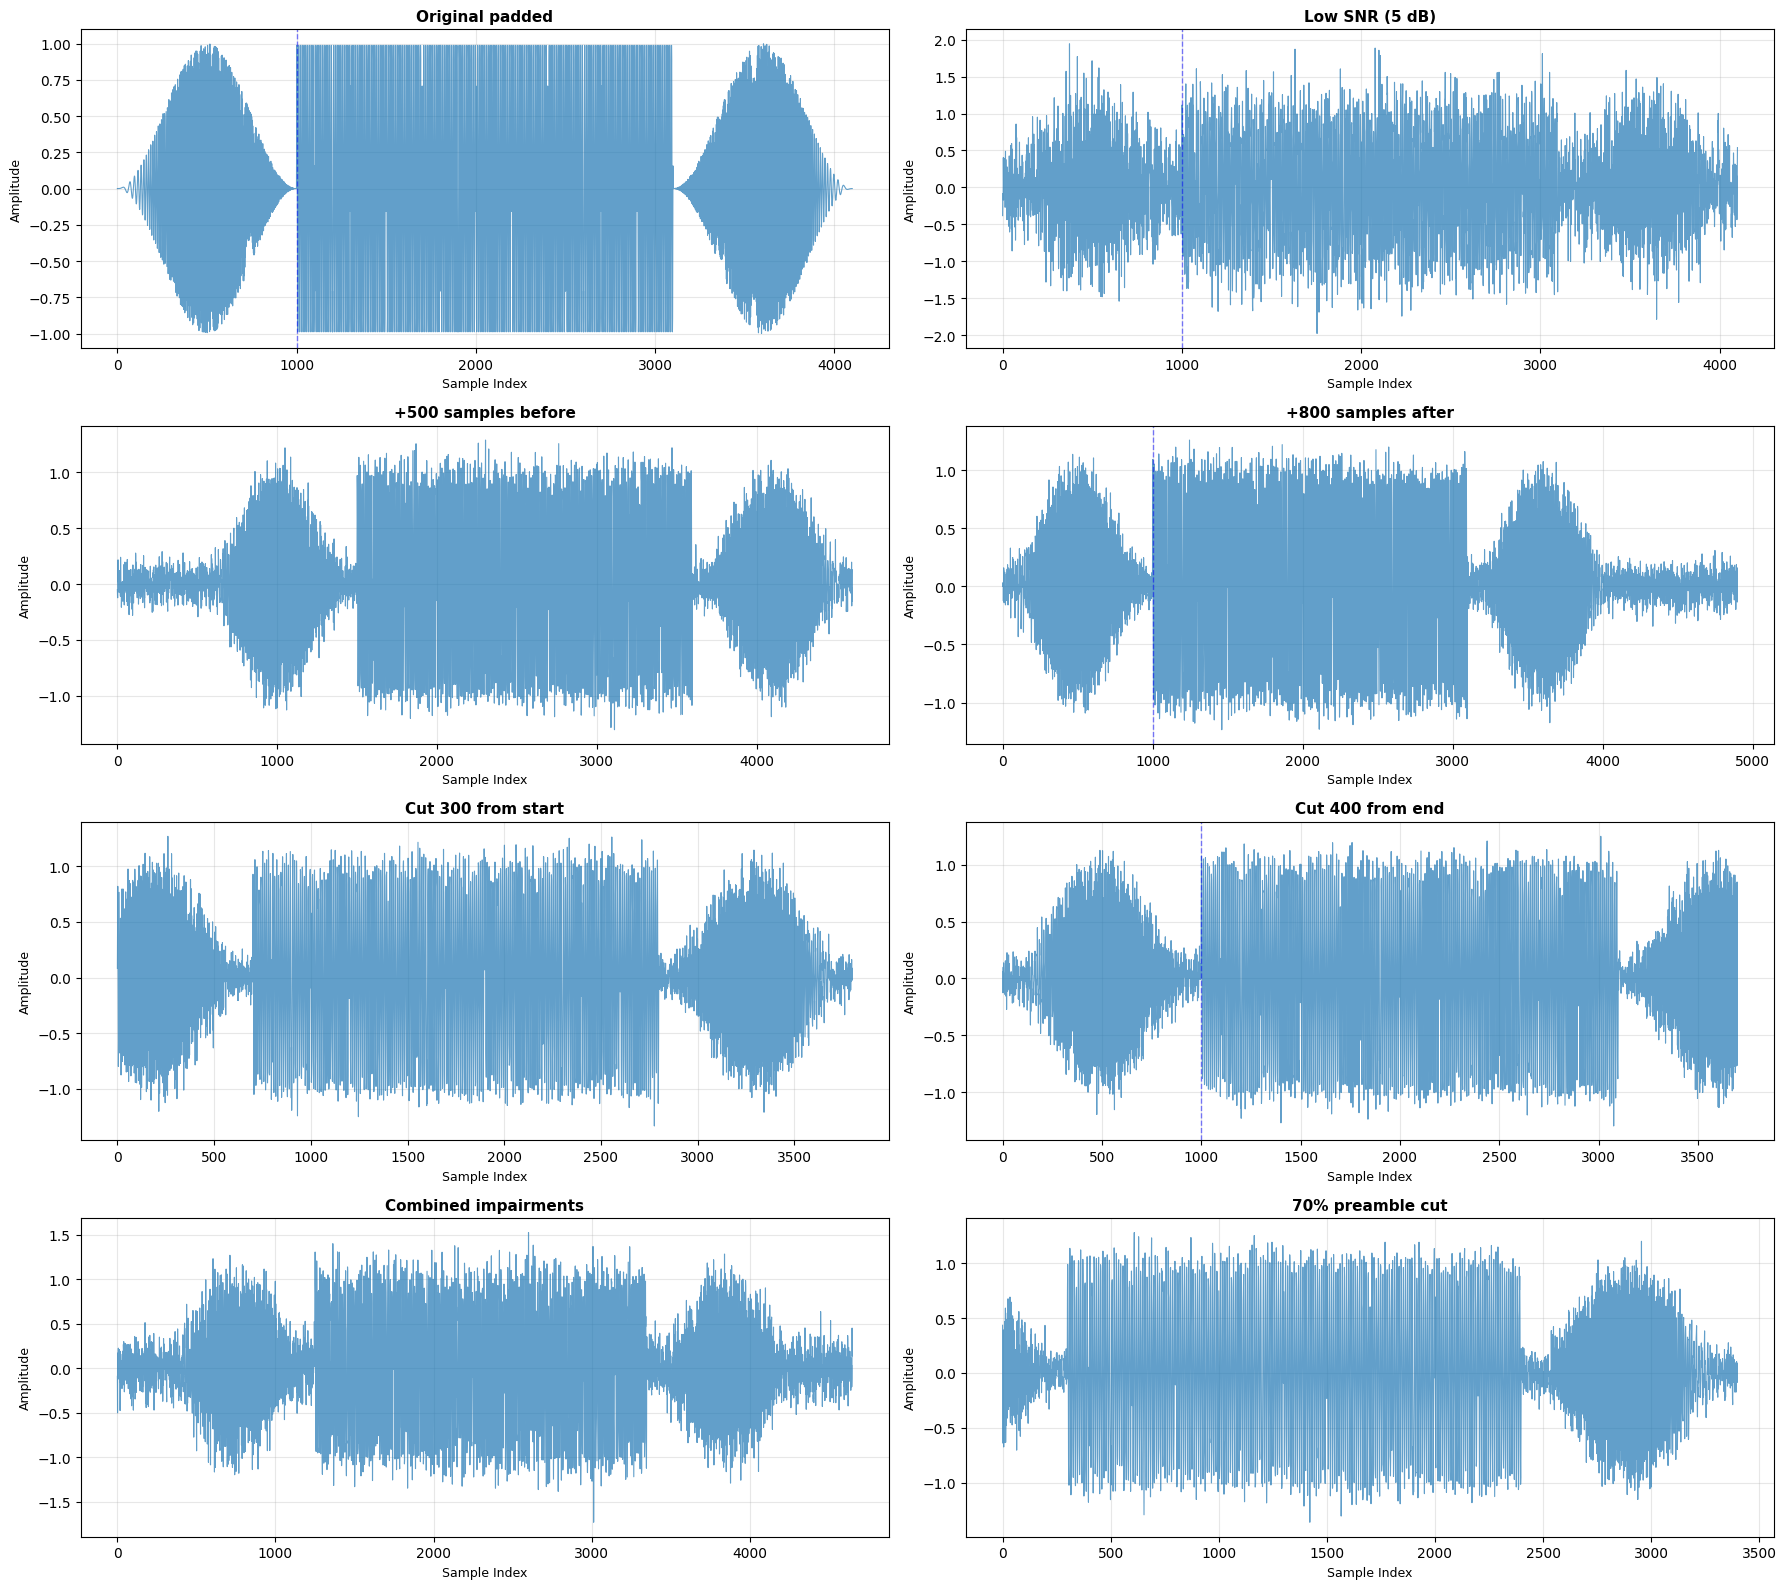

In [ ]:
# Visualize different transmission scenarios
fig, axes = plt.subplots(4, 2, figsize=(18, 16))
axes = axes.flatten()

# Select some interesting scenarios to visualize
scenarios_to_plot = [
    {'name': 'Original padded', 'snr_db': 1000, 'add_before': 0, 'add_after': 0, 'cut_from_start': 0, 'cut_from_end': 0},
    {'name': 'Low SNR (5 dB)', 'snr_db': 5.0, 'add_before': 0, 'add_after': 0, 'cut_from_start': 0, 'cut_from_end': 0},
    {'name': '+500 samples before', 'snr_db': 15.0, 'add_before': 500, 'add_after': 0, 'cut_from_start': 0, 'cut_from_end': 0},
    {'name': '+800 samples after', 'snr_db': 15.0, 'add_before': 0, 'add_after': 800, 'cut_from_start': 0, 'cut_from_end': 0},
    {'name': 'Cut 300 from start', 'snr_db': 15.0, 'add_before': 0, 'add_after': 0, 'cut_from_start': 300, 'cut_from_end': 0},
    {'name': 'Cut 400 from end', 'snr_db': 15.0, 'add_before': 0, 'add_after': 0, 'cut_from_start': 0, 'cut_from_end': 400},
    {'name': 'Combined impairments', 'snr_db': 10.0, 'add_before': 400, 'add_after': 500, 'cut_from_start': 150, 'cut_from_end': 200},
    {'name': '70% preamble cut', 'snr_db': 15.0, 'add_before': 0, 'add_after': 0, 'cut_from_start': 700, 'cut_from_end': 0}
]

for idx, scenario in enumerate(scenarios_to_plot):
    if scenario['snr_db'] == 1000:  # Special case for "clean" original
        signal_to_plot = padded_signal
    else:
        signal_to_plot, _ = synchroniser.simulate_transmission(
            padded_signal,
            snr_db=scenario['snr_db'],
            add_before=scenario['add_before'],
            add_after=scenario['add_after'],
            cut_from_start=scenario['cut_from_start'],
            cut_from_end=scenario['cut_from_end']
        )
    
    # Plot first 5000 samples
    N_plot = min(5000, len(signal_to_plot))
    axes[idx].plot(signal_to_plot[:N_plot], linewidth=0.8, alpha=0.7)
    axes[idx].set_title(scenario['name'], fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Sample Index', fontsize=9)
    axes[idx].set_ylabel('Amplitude', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Mark expected preamble and postamble positions (if not cut)
    if scenario['add_before'] == 0 and scenario['cut_from_start'] == 0:
        axes[idx].axvline(x=synchroniser.preamble_length, color='blue', 
                         linestyle='--', linewidth=1, alpha=0.5, label='Preamble end')
    
plt.tight_layout()
plt.show()